In [25]:
import cv2
from ultralytics import YOLO
from PIL import Image
from pathlib import Path
import numpy as np
import math
from matplotlib import pyplot as plt

In [26]:
ROOT = Path().resolve().parent

In [27]:
img_path = ROOT / 'images' / 'hornet.jpg'

In [28]:
img = Image.open(img_path)

In [29]:
img_grey = img.convert('L')

In [30]:
# img_mat

In [31]:
old_size = img.size

In [32]:
new_size = (old_size[0] // 16, old_size[1] // 16)

In [33]:
new_size

(81, 55)

In [34]:
img_grey = img_grey.resize(new_size)

In [35]:
img_mat = np.array(img_grey)

In [36]:
img_mat.mean()

np.float64(94.14163860830527)

In [37]:
img_mat_filtered = np.where(img_mat>128,img_mat,0)

In [38]:
img_test = Image.fromarray(img_mat_filtered)

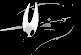

In [39]:
img_test

In [40]:
chars = """$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/|()1{}[]?-_+~<>i!lI;:,"^`'."""

In [41]:
len(chars)

68

In [42]:
new_chars = np.array(list(chars[:-4][::-1]))

In [53]:
char_len = len(new_chars)

In [54]:
# new_chars

In [55]:
# len(new_chars)

In [56]:
img_mat_filtered

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(55, 81), dtype=uint8)

In [57]:
threshold = 128

In [58]:
def get_ascii(x):
        return np.floor((x - threshold - 1) / (np.ceil((255 - threshold) / char_len)) - 1).astype(int)

In [59]:
img_ascii = np.where(img_mat_filtered>=128,new_chars[get_ascii(img_mat_filtered)],'.')

In [60]:
# img_ascii

In [61]:
lines = []
for line in img_ascii:
    line_list = list(line)
    line_list.append(np.str_('\n'))
    # print(line_list)
    new_line = ''.join(line)
    lines.append(new_line)

In [62]:
# lines[0]

In [63]:
with open ('text.txt', 'w', encoding='utf-8') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [64]:
# with open ('text.txt', 'w', encoding='utf-8') as f:
#     f.write('test')